In [91]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from pandas.tools.plotting import scatter_matrix

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [92]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#what is header = 9? why these 10 files and not other 8?

allmales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales={}
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

print allfemales['all']['Median income'][1]

22063


In [93]:
print allmales['all'].columns
print allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [94]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

for f in allfemales:
    nonreal  = allfemales[f].applymap(np.isreal)
    for o in allfemales[f].columns :
        if nonreal.sum()[o]>1 and nonreal.sum()[o]<49:
            allfemales[f][o][~nonreal[o]] = np.float('NaN')
            allfemales[f][o] = allmales[f][o].astype(float)

/Users/rachelcohen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rachelcohen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [95]:
type(allfemales['all']['Median income'])

pandas.core.series.Series

In [96]:
#tried scatter matrix - plotted everything but completely illegible
#scatter_matrix (allfemales['all'], s = 300, figsize=(16, 16), diagonal='kde')

allfemales['all'].head(10)
#looking just at a few rows shows what data is in the spreadsheets - we want to the total row(1) from the Median Income column for each group

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,35228,211,50779,447,0.501,0.0033
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,40298,167,54268,543,0.483,0.0040
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,19557,1391,34247,1291,0.630,0.0092
5,..Farm Self-Employment,774,592,57,0,21,18,4,4,0,...,0,0,0,15,2359,106,20918,2837,0.820,0.0168
6,Social Security,26923,770,1294,2750,5261,5022,4252,2990,1924,...,0,0,0,0,15974,96,15892,86,0.237,0.0028
7,SSI (Supplemental Security Income),3386,515,559,363,1428,232,130,72,30,...,0,0,0,0,8232,95,8374,174,0.298,0.0113
8,Public Assistance,1541,759,409,257,74,9,17,5,3,...,0,0,0,0,1829,117,2123,236,0.571,0.0275
9,Veterans Benefits,619,79,58,48,68,56,113,49,31,...,0,0,6,0,11010,529,14810,487,0.490,0.0094


In [97]:
allmales['all'].head(10)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,....Total,108706,4407,2665,3200,4027,4418,3333,5027,3807,...,513,626,457,12003,35228,211,50779,447,0.501,0.0033
2,Earnings,83555,3217,2326,2560,1964,3118,1505,3451,1959,...,246,559,259,10113,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263,2779,2184,2419,1780,2777,1365,3149,1847,...,244,540,257,9392,40298,167,54268,543,0.483,0.0040
4,..Nonfarm Self-Employment,7014,1478,280,342,231,556,144,377,122,...,0,18,0,516,19557,1391,34247,1291,0.630,0.0092
5,..Farm Self-Employment,1518,804,62,66,26,75,15,70,14,...,0,2,3,83,2359,106,20918,2837,0.820,0.0168
6,Social Security,21454,555,859,919,1784,2250,3063,3329,3282,...,0,0,0,0,15974,96,15892,86,0.237,0.0028
7,SSI (Supplemental Security Income),2667,298,283,447,1041,225,126,78,78,...,0,0,0,0,8232,95,8374,174,0.298,0.0113
8,Public Assistance,456,312,97,30,12,2,2,0,0,...,0,0,0,0,1829,117,2123,236,0.571,0.0275
9,Veterans Benefits,2899,545,385,250,178,228,189,140,175,...,0,0,0,0,11010,529,14810,487,0.490,0.0094


In [87]:
med_male = allmales['all']['Median income'][1]
med_white = allmales['white']['Median income'][1]
med_black = allmales['black']['Median income'][1]
med_hispanic = allmales['hispanic']['Median income'][1]
med_asian = allmales['asian']['Median income'][1]
print [med_male, med_white, med_black, med_hispanic, med_asian]


[35228.0, 40122.0, 24855.0, 25411.0, 40153.0]


In [98]:
mf = allfemales['all']['Median income'][1]
mfw = allfemales['white']['Median income'][1]
mfb = allfemales['black']['Median income'][1]
mfh = allfemales['hispanic']['Median income'][1]
mfa = allfemales['asian']['Median income'][1]
print [mf, mfw, mfb, mfh, mfa]

[35228.0, 40122.0, 24855.0, 25411.0, 40153.0]


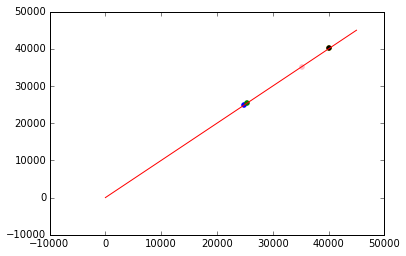

In [84]:
pl.scatter(mf, med_male, color='pink')
pl.scatter(mfw, fmed_white, color='yellow')
pl.scatter(mfb, fmed_black, color='blue')
pl.scatter(mfh, fmed_hispanic, color='green')
pl.scatter(mfa, fmed_asian, color='black')

x = numpy.arange(0,45000,1)
pl.plot(x, x, color='red')


In [85]:
#to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)
#describe in caption

In [90]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import scipy as sp

cor = sp.stats.spearmanr(mf, med_male)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

ValueError: axis must be less than arr.ndim; axis=0, rank=0.